# Project Instruction
InnovateIQ Corporation is a technology company specializing in medical instrument based in New York. Attrition is a significant concern for InnovateIQ Corporation as it can lead to a loss of valuable talent and increased recruitment costs. As a data scientist at InnovateIQ Corporation, your task is to generate a machine learning model to predict attrition of employees using historical data, including employee demographic information and job-related details, and evaluate the model's performance using appropriate metrics. Dataset is available at project_dataset.csv.

Description of the variables:
- EmployeeID - unique identifier for each employee
- age - Age of the employee
- BusinessTravel - represents the frequency of travel required for an employee job
- MonthlyIncome - income earned per month by an employee
- JobSatisfaction - level of employee satisfaction with their job (higher is better)
- Bonus - Additional financial compensation as reward given to employee
- Department - division of an organization that an employee works for
- DistanceFromHome - variable representing distance of employee's home to office
- Education - level of education of employee
- EducationField - field of study in which employee was educated
- EnvSatisfaction - level of employee satisfaction with working environment
- Gender - employee's gender
- JobRole - role of the employee within the company
- MaritalStatus - employee's marital status
- PerformanceRating - employee's performance evaluation rating
- TrainingTimeLastYear - number of training hours employee received last year
- YearsAtCompany - number of years employee has worked at company
- YearsSinceLastPromotion - number of years since employee's last promotion
- Overtime - whether or not employee works overtime
- Attrition - whether or not employee left the company

### A. Coding Activities
As a data scientist, your tasks are to perform the following tasks using Python programming language:
1. Import and check the quality of the dataset. Treat problem if any.
2. Perform Exploratory Data Analysis into the dataset to obtain insights and relevant information as much as you can. Use the findings for features selection.
3. Pre-processing the dataset and make it ready to train the algorithm.
4. Train relevant machine learning algorithm to generate the predictive model to forecast relevant output.
5. Evaluate and discuss the performance of the model.
6. Finally, save your Jupyter Notebook work file as firstname_project.ipynb for submission.

### B. Analytics Report
Prepare a presentation slide using PowerPoint as your analytics complete report of your findings, insights and model performance. Save your report as firstname_report.pptx. Your report should contain the following insights:
1. Introduction
2. Describe your analytics process
3. Discuss findings of univariate analysis
4. Discuss findings of multivariate analysis (response vs input's candidates)
5. Discuss about the performance of your model
6. Add any information that you think necessary for this report

### C. Presentation
As part of your evaluation, you will be required to present your key findings and analytics process of your project. You only been given for 5-minutes to present your data science findings to the panel of assessors. The presentation will be held on 21st January 2022 starting from 9AM. Schedule of your presentation will be announced by the organizer. You are requiring to prepare a 5-minutes presentation slide on your key findings for live presentation, as suggested follows:
1. Describe the process of your analytics work
2. Major findings of your EDA
3. Discuss about your model

In [1]:
#import relevant packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load data
df = pd.read_csv('project_dataset.csv',
                index_col=['EmployeeID'])

df.head(10)

,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,Education,EducationField,EnvSatisfaction,Gender,JobRole,MaritalStatus,PerformanceRating,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,OverTime,Attrition
EmployeeID,,,,,,,,,,,,,,,,,,,
1,41,Travel_Rarely,5993,4,17979,Sales,1,2,Life Sciences,2,Female,Sales Executive,Single,3,0,6,0,Yes,Yes
2,49,Travel_Frequently,5130,2,20520,Research & Development,8,1,Life Sciences,3,Male,Research Scientist,Married,4,3,10,1,No,No
4,37,Travel_Rarely,2090,3,6270,Research & Development,2,2,Other,4,Male,Laboratory Technician,Single,3,3,0,0,Yes,Yes
5,33,Travel_Frequently,2909,3,8727,Research & Development,3,4,Life Sciences,4,Female,Research Scientist,Married,3,3,8,3,Yes,No
7,27,Travel_Rarely,3468,2,10404,Research & Development,2,1,Medical,1,Male,Laboratory Technician,Married,3,3,2,2,No,No
8,32,Travel_Frequently,3068,4,9204,Research & Development,2,2,Life Sciences,4,Male,Laboratory Technician,Single,3,2,7,3,No,No
10,59,Travel_Rarely,2670,1,10680,Research & Development,3,3,Medical,3,Female,Laboratory Technician,Married,4,3,1,0,Yes,No
11,30,Travel_Rarely,2693,3,10772,Research & Development,24,1,Life Sciences,4,Male,Laboratory Technician,Divorced,4,2,1,0,No,No
12,38,Travel_Frequently,9526,3,38104,Research & Development,23,3,Life Sciences,4,Male,Manufacturing Director,Single,4,2,9,1,No,No


In [3]:
#Data quality check
df.isnull().sum()

Age                        0
BusinessTravel             0
MonthlyIncome              0
JobSatisfaction            0
Bonus                      0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvSatisfaction            0
Gender                     0
JobRole                    0
MaritalStatus              0
PerformanceRating          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
OverTime                   0
Attrition                  0
dtype: int64

In [4]:
df.shape

(1470, 19)

In [5]:
#Data summary
df.describe(include='all')

,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,Education,EducationField,EnvSatisfaction,Gender,JobRole,MaritalStatus,PerformanceRating,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,OverTime,Attrition
count,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470,1470.000000,1470,1470,1470,1470.000000,1470.000000,1470.000000,1470.000000,1470,1470
unique,NaN,3,NaN,NaN,NaN,3,NaN,NaN,6,NaN,2,9,3,NaN,NaN,NaN,NaN,2,2
top,NaN,Travel_Rarely,NaN,NaN,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,Male,Sales Executive,Married,NaN,NaN,NaN,NaN,No,No
freq,NaN,1043,NaN,NaN,NaN,961,NaN,NaN,606,NaN,882,326,673,NaN,NaN,NaN,NaN,1054,1233
mean,36.923810,NaN,6502.931293,2.728571,20479.501361,NaN,9.192517,2.912925,NaN,2.721769,NaN,NaN,NaN,3.153741,2.799320,7.008163,2.187755,NaN,NaN
std,9.135373,NaN,4707.956783,1.102846,15066.272964,NaN,8.106864,1.024165,NaN,1.093082,NaN,NaN,NaN,0.360824,1.289271,6.126525,3.222430,NaN,NaN
min,18.000000,NaN,1009.000000,1.000000,3027.000000,NaN,1.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,3.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,30.000000,NaN,2911.000000,2.000000,9333.750000,NaN,2.000000,2.000000,NaN,2.000000,NaN,NaN,NaN,3.000000,2.000000,3.000000,0.000000,NaN,NaN
50%,36.000000,NaN,4919.000000,3.000000,15484.500000,NaN,7.000000,3.000000,NaN,3.000000,NaN,NaN,NaN,3.000000,3.000000,5.000000,1.000000,NaN,NaN
75%,43.000000,NaN,8379.000000,4.000000,26103.750000,NaN,14.000000,4.000000,NaN,4.000000,NaN,NaN,NaN,3.000000,3.000000,9.000000,3.000000,NaN,NaN


Data Consistency; look for inconsistencies in the data, such as misspellings, inconsistent capitalization, or inconsistent formats. (Important for categorical variable)

In [6]:
column_name = 'PerformanceRating'  # Replace this with the column we want to check
column_summary = df[column_name].describe()
print(column_summary)

unique_values = df[column_name].unique()
print(unique_values)

count    1470.000000
mean        3.153741
std         0.360824
min         3.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: PerformanceRating, dtype: float64
[3 4]


### Explore Attrition - Univariate Analysis

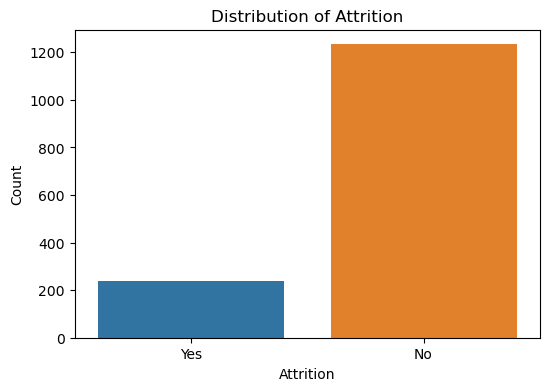

No     1233
Yes     237
Name: Attrition, dtype: int64


In [7]:
# Count occurrences of each value in the "Attrition" column
AttritionCounts = df['Attrition'].value_counts()

# Create a count plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Attrition')
plt.title("Distribution of Attrition")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

# Display the count of each value
print(AttritionCounts)

In [8]:
TotalEmployees = AttritionCounts.sum()

AttritionRate = AttritionCounts[1] / TotalEmployees * 100

print(f"Attrition Rate = {AttritionRate:.2f}%")

Attrition Rate = 16.12%


### Explore other variables

Numerical Variables
1. Age
2. MonthlyIncome
3. Bonus
4. DistanceFromHome
5. TrainingTimeLastYear
6. YearsAtCompany
7. YearsSinceLastPromotion

Categorical Variables
1. BusinessTravel
2. JobSatisfaction
3. Department
4. Education
5. EducationField
6. EnvSatisfaction
7. Gender
8. JobRole
9. MaritalStatus
10. PerformanceRating
11. OverTime

### EDA - Numerical Variables

#### 1. Age

In [9]:
#Numerical vs Categorical (Attrition)

meanAge_Attrition = df.groupby('Attrition',as_index=False)['Age'].mean()

meanAge_Attrition.round(2)

,Attrition,Age
0,No,37.56
1,Yes,33.61


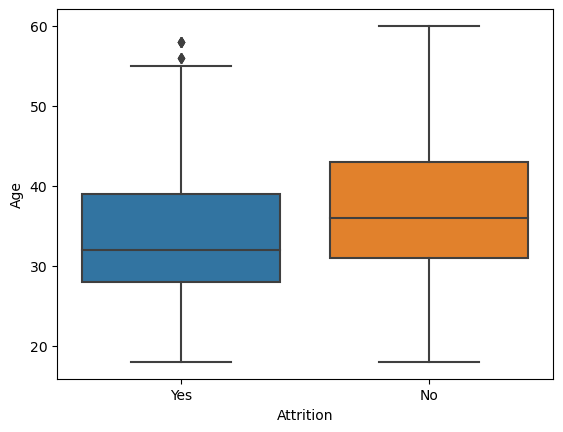

In [10]:
sns.boxplot(x='Attrition',y='Age',data=df)
plt.show()

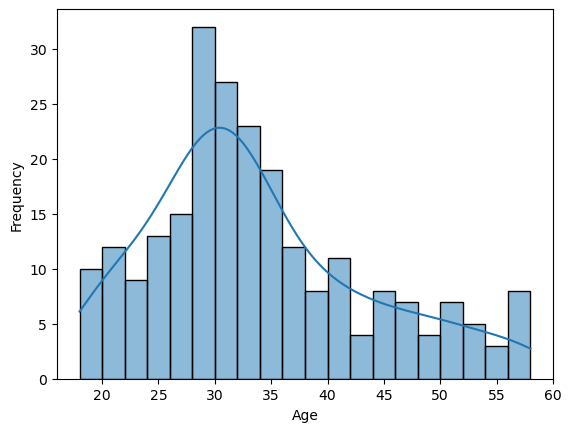

In [11]:
# Reviewing the Outliers in 'Yes'

# Filter the data for Attrition == 'Yes'
outliers_yes_age = df[df['Attrition'] == 'Yes']['Age']

# Create the distribution plot
sns.histplot(data=outliers_yes_age, bins=20, kde=True)  # You can adjust the number of bins as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# seems like them outliers are acceptable, keeping them in the dataset for the ML module

In [12]:
#calculate skewness value, using scipy
from scipy.stats import skew

round(skew(outliers_yes_age,bias=True),2)

0.71

In [13]:
# Levene test to check the difference in var between two groups

import scipy.stats as stats

stats.levene(df['Age'][df['Attrition']=='Yes'],
             df['Age'][df['Attrition']=='No'],
             center='mean') 

LeveneResult(statistic=1.1583170677572885, pvalue=0.2819916793250208)

Above means that Var is equal for both group, p-value more than 0.05

In [14]:
# null hypothesis = there is no significant difference in Age between employees who left and stayed in the company

stats.ttest_ind(df['Age'][df['Attrition']=='Yes'],
                df['Age'][df['Attrition']=='No'],
                equal_var=True)

Ttest_indResult(statistic=-6.178663835307217, pvalue=8.356308021103587e-10)

p-value (TTest) is extremely small (much smaller than the conventional significance level of 0.05 or 0.01), it indicates strong evidence against the null hypothesis. 

Therefore, we can conclude that there is a statistically significant difference in the means of the "Age" variable between employees who have left the company and those who have stayed. 

In other words, the age of employees who left the company is significantly different from the age of employees who stayed, and age might be a significant factor related to attrition.

End of Age EDA section

#### 2. Monthly Income

In [15]:
df.head()

,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,Education,EducationField,EnvSatisfaction,Gender,JobRole,MaritalStatus,PerformanceRating,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,OverTime,Attrition
EmployeeID,,,,,,,,,,,,,,,,,,,
1,41,Travel_Rarely,5993,4,17979,Sales,1,2,Life Sciences,2,Female,Sales Executive,Single,3,0,6,0,Yes,Yes
2,49,Travel_Frequently,5130,2,20520,Research & Development,8,1,Life Sciences,3,Male,Research Scientist,Married,4,3,10,1,No,No
4,37,Travel_Rarely,2090,3,6270,Research & Development,2,2,Other,4,Male,Laboratory Technician,Single,3,3,0,0,Yes,Yes
5,33,Travel_Frequently,2909,3,8727,Research & Development,3,4,Life Sciences,4,Female,Research Scientist,Married,3,3,8,3,Yes,No
7,27,Travel_Rarely,3468,2,10404,Research & Development,2,1,Medical,1,Male,Laboratory Technician,Married,3,3,2,2,No,No


In [16]:
#Numerical vs Categorical (Attrition)

meanIncome_Attrition = df.groupby('Attrition', as_index=False)['MonthlyIncome'].mean()
meanIncome_Attrition.round(2)

,Attrition,MonthlyIncome
0,No,6832.74
1,Yes,4787.09


In [17]:
medianIncome_Attrition = df.groupby('Attrition', as_index=False)['MonthlyIncome'].median()
medianIncome_Attrition.round(2)

,Attrition,MonthlyIncome
0,No,5204.0
1,Yes,3202.0


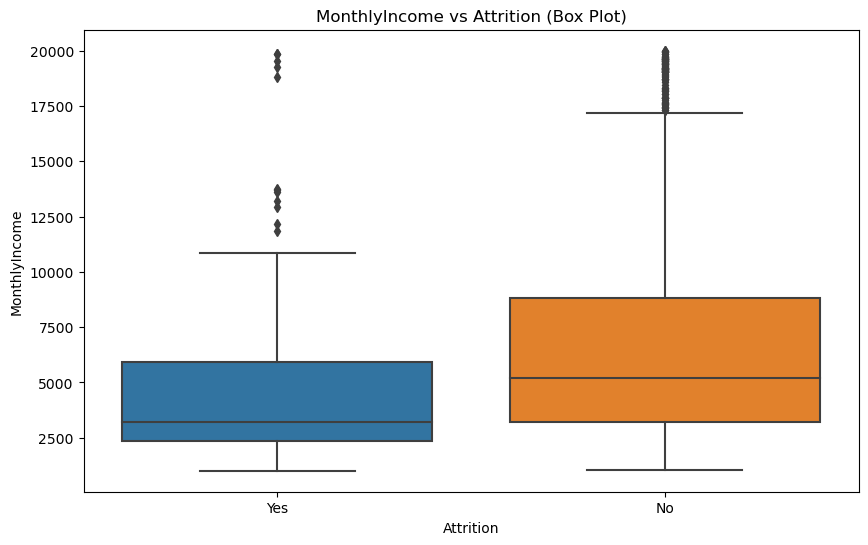

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('MonthlyIncome vs Attrition (Box Plot)')
plt.show()

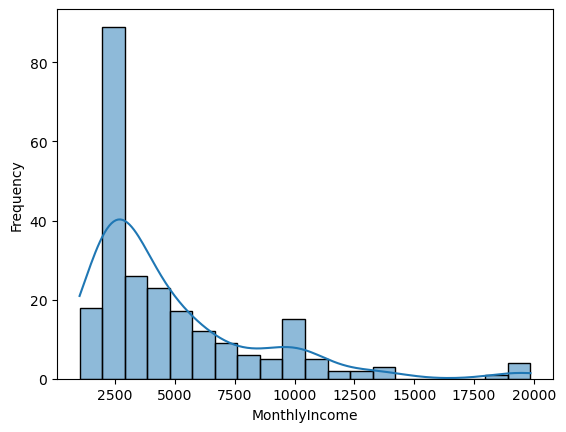

In [19]:
# Reviewing the Outliers in 'Yes'

# Filter the data for Attrition == 'Yes'
outliers_yes_income = df[df['Attrition'] == 'Yes']['MonthlyIncome']

# Create the distribution plot
sns.histplot(data=outliers_yes_income, bins=20, kde=True)  # You can adjust the number of bins as needed
plt.xlabel('MonthlyIncome')
plt.ylabel('Frequency')
plt.show()

# seems like them outliers are significant, considering to remove them from the dataset for the ML module. We'l see

In [20]:
#calculate skewness value, using scipy
#from scipy.stats import skew

round(skew(outliers_yes_income,bias=True),2)

# the outliers seem plausible, but would it be good to remove the outliers for the ML model?
# Including outliers in the training data can help the model generalize better to unseen data, 
# as it learns to account for different data distributions and variations.

1.91

In [21]:
# Levene test to check the difference in var between two groups

#import scipy.stats as stats

stats.levene(df['MonthlyIncome'][df['Attrition']=='Yes'],
             df['MonthlyIncome'][df['Attrition']=='No'],
             center='median')

# use median instead of mean for levene test and retain the outliers for the ML model.

LeveneResult(statistic=14.899586974568717, pvalue=0.00011830973427184532)

In [22]:
# Levene test to check the difference in var between two groups

#import scipy.stats as stats

stats.levene(df['MonthlyIncome'][df['Attrition']=='Yes'],
             df['MonthlyIncome'][df['Attrition']=='No'],
             center='mean')

# using mean, still not equal Var

LeveneResult(statistic=26.31302358992364, pvalue=3.29070575711061e-07)

Above means that Var is not equal for both group, p-value less than 0.05 (also less than 0.01 - significantly different)

In [23]:
# null hypothesis = there is no significant difference in MonthlyIncome between employees who left and stayed in the company

stats.ttest_ind(df['MonthlyIncome'][df['Attrition']=='Yes'],
                df['MonthlyIncome'][df['Attrition']=='No'],
                equal_var=False)

Ttest_indResult(statistic=-7.482621586644742, pvalue=4.433588628286071e-13)

Statistic: -7.482621586644742

p-value: 4.433588628286071e-13

The t-test is used to determine if there is a significant difference between the means of two groups. In your case, you are comparing the 'MonthlyIncome' of employees who left ('Attrition' == 'Yes') with those who stayed ('Attrition' == 'No').

Statistic: The statistic value represents the t-statistic calculated by the test. It quantifies how much the means of the two groups differ from each other relative to the variability within each group. A larger absolute value of the t-statistic suggests a larger difference between the means.

p-value: The p-value is a measure of evidence against the null hypothesis. In this context, the null hypothesis is that there is no difference in 'MonthlyIncome' between employees who left and employees who stayed. A low p-value indicates strong evidence against the null hypothesis, suggesting that the difference in means is statistically significant.

Interpretation:

- The negative sign of the statistic indicates that the mean 'MonthlyIncome' for employees who left is lower than for those who stayed.
- The extremely small p-value (4.433588628286071e-13) indicates that the difference in 'MonthlyIncome' between the two groups is highly statistically significant. In other words, it is very unlikely to observe such a difference if there were no real difference between the groups.

In conclusion, based on the t-test results, there is strong evidence to suggest that there is a significant difference in 'MonthlyIncome' between employees who left and employees who stayed at the company.

End of MonthlyIncome EDA section

#### 3. Bonus

In [24]:
#Numerical vs Categorical (Attrition)

meanBonus_Attrition = df.groupby('Attrition', as_index=False)['Bonus'].mean()
meanBonus_Attrition.round(2)

,Attrition,Bonus
0,No,21543.95
1,Yes,14941.67


In [25]:
medianBonus_Attrition = df.groupby('Attrition', as_index=False)['Bonus'].median()
medianBonus_Attrition.round(2)

,Attrition,Bonus
0,No,16131.0
1,Yes,10392.0


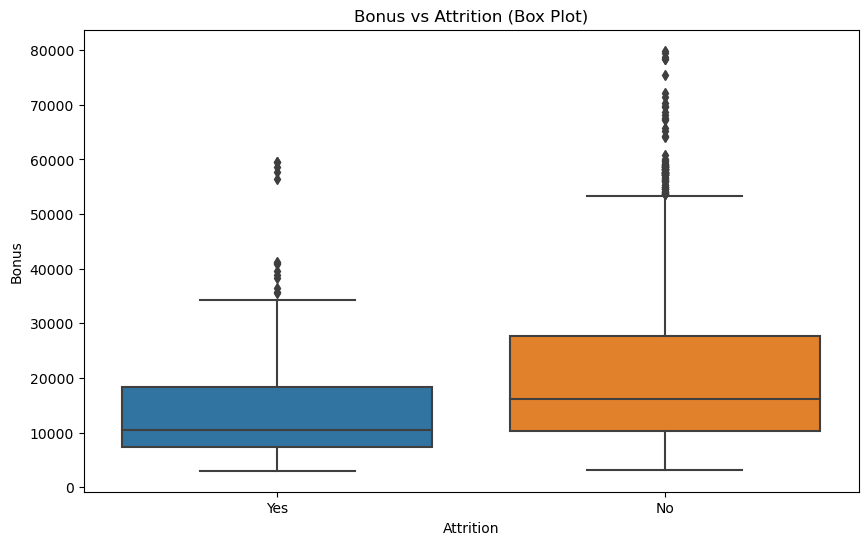

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='Bonus', data=df)
plt.title('Bonus vs Attrition (Box Plot)')
plt.show()

In [27]:
# Levene test to check the difference in var between two groups

#import scipy.stats as stats

stats.levene(df['Bonus'][df['Attrition']=='Yes'],
             df['Bonus'][df['Attrition']=='No'],
             center='median')

# use median instead of mean for levene test due to outliers

LeveneResult(statistic=17.077456087575865, pvalue=3.791296978978068e-05)

Above means that Var is not equal for both group, p-value less than 0.05 (also less than 0.01 - significantly different)

In [28]:
# null hypothesis = there is no significant difference in Bonus between employees who left and stayed in the company

stats.ttest_ind(df['Bonus'][df['Attrition']=='Yes'],
                df['Bonus'][df['Attrition']=='No'],
                equal_var=False)

Ttest_indResult(statistic=-7.831954710068883, pvalue=3.692333845137077e-14)

T-Test Result Explanation: Bonus Variable

T-Test Statistic: The t-test statistic for the "Bonus" variable comparison is approximately -7.83. This number reflects the extent of the difference in mean bonus values between employees who have left the company and those who have stayed.

P-Value: The p-value associated with this t-test is approximately 3.69e-14, an exceedingly small value. The p-value represents the likelihood of encountering such substantial differences (or even more substantial) between the two groups, assuming that there isn't a genuine distinction between them (null hypothesis being true). With such a minute p-value, there's compelling evidence against the null hypothesis.

In simpler terms, the exceptionally low p-value indicates that the observed disparity in mean bonuses between departing employees and those who remain is highly unlikely to occur by mere chance. This typically leads us to reject the null hypothesis.

Interpreting this outcome, we can conclude that there's a noteworthy difference in bonus amounts between employees who have left the company and those who have chosen to stay. The actual impact or significance of this distinction will depend on the specifics of our analysis and our understanding of the industry's dynamics.

End of Bonus EDA section

#### 4. DistanceFromHome

In [29]:
#Numerical vs Categorical (Attrition)

meanHome_Attrition = df.groupby('Attrition', as_index=False)['DistanceFromHome'].mean()
meanHome_Attrition.round(2)

,Attrition,DistanceFromHome
0,No,8.92
1,Yes,10.63


In [30]:
meanHome_Attrition = df.groupby('Attrition', as_index=False)['DistanceFromHome'].median()
meanHome_Attrition.round(2)

,Attrition,DistanceFromHome
0,No,7.0
1,Yes,9.0


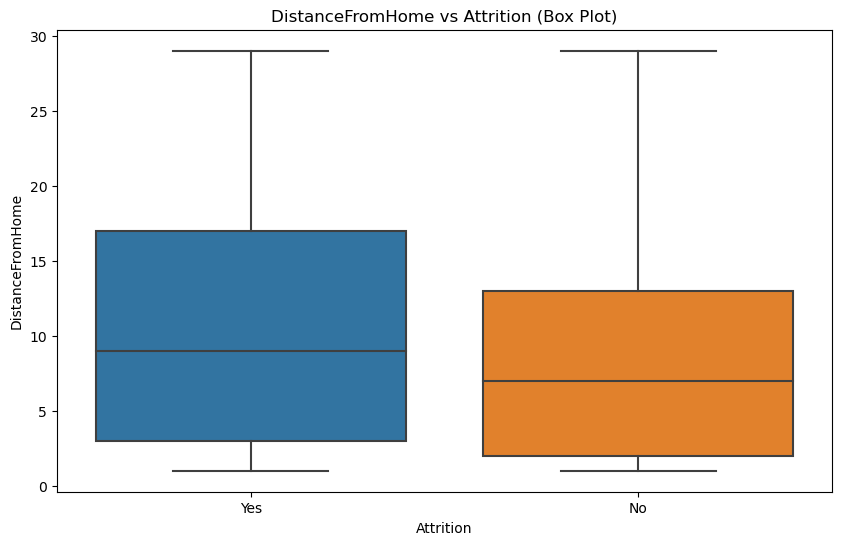

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df)
plt.title('DistanceFromHome vs Attrition (Box Plot)')
plt.show()

In [32]:
# Levene test to check the difference in var between two groups

#import scipy.stats as stats

stats.levene(df['DistanceFromHome'][df['Attrition']=='Yes'],
             df['DistanceFromHome'][df['Attrition']=='No'],
             center='mean')


LeveneResult(statistic=4.974146689763782, pvalue=0.025879557896104303)

Above means that Var is NOT equal for both group, p-value less than 0.05

In [33]:
# null hypothesis = there is no significant difference in DistanceFromHome between employees who left and stayed in the company

stats.ttest_ind(df['DistanceFromHome'][df['Attrition']=='Yes'],
                df['DistanceFromHome'][df['Attrition']=='No'],
                equal_var=False)

Ttest_indResult(statistic=2.888183062817627, pvalue=0.004136511971511406)

T-Test Result Explanation: DistanceFromHome Variable

T-Test Statistic: The t-test statistic for the "DistanceFromHome" variable comparison is approximately 2.89. This number reflects the extent of the difference in mean distances from home between employees who have left the company and those who have stayed.

P-Value: The p-value associated with this t-test is approximately 0.004. This p-value indicates the likelihood of encountering such a substantial difference (or even more substantial) in mean distances from home between the two groups, assuming that there isn't a genuine distinction between them (null hypothesis being true). With a p-value of 0.004, there is strong evidence against the null hypothesis.

In simpler terms, the p-value suggests that the observed difference in mean distances from home between departing employees and those who remain is highly unlikely to occur by mere chance. This typically leads us to reject the null hypothesis.

Interpreting this outcome, we can conclude that there's a statistically significant difference in the mean distances from home between employees who have left the company and those who have chosen to stay. The actual impact or significance of this distinction will depend on the specifics of our analysis and our understanding of the industry's dynamics.

End of DistanceFromHome EDA section

#### 5. TrainingTimeLastYear

In [34]:
df.columns

Index(['Age', 'BusinessTravel', 'MonthlyIncome', 'JobSatisfaction', 'Bonus',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvSatisfaction', 'Gender', 'JobRole', 'MaritalStatus',
       'PerformanceRating', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'OverTime', 'Attrition'],
      dtype='object')

In [35]:
#Numerical vs Categorical (Attrition)

meanTraining_Attrition = df.groupby('Attrition', as_index=False)['TrainingTimesLastYear'].mean()
meanTraining_Attrition.round(2)

,Attrition,TrainingTimesLastYear
0,No,2.83
1,Yes,2.62


In [36]:
medianTraining_Attrition = df.groupby('Attrition', as_index=False)['TrainingTimesLastYear'].median()
medianTraining_Attrition.round(2)

,Attrition,TrainingTimesLastYear
0,No,3.0
1,Yes,2.0


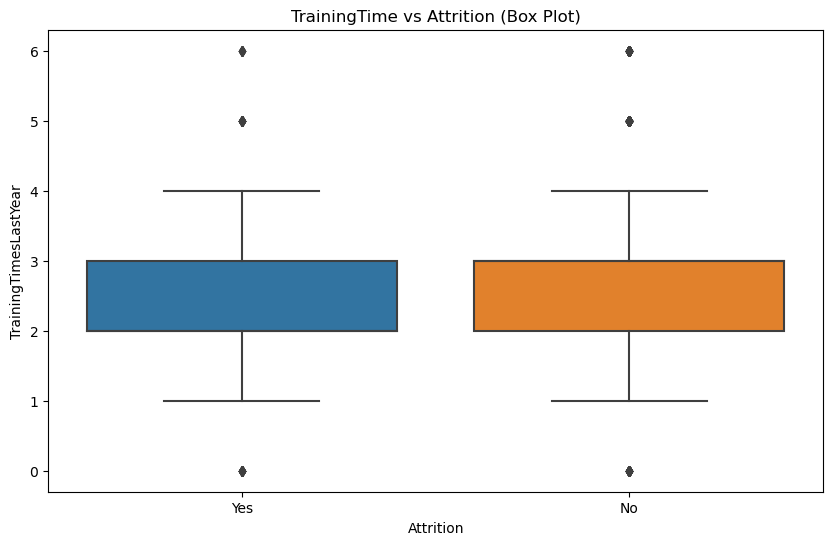

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='TrainingTimesLastYear', data=df)
plt.title('TrainingTime vs Attrition (Box Plot)')
plt.show()

In [38]:
# Levene test to check the difference in var between two groups

#import scipy.stats as stats

stats.levene(df['TrainingTimesLastYear'][df['Attrition']=='Yes'],
             df['TrainingTimesLastYear'][df['Attrition']=='No'],
             center='mean')

# use median instead of mean for levene test due to outliers
# but visually, the two look identical, with both having similar outliers, mean also can

LeveneResult(statistic=0.0009627467164361536, pvalue=0.9752512997636223)

Above means that Var is equal for both group, p-value more than 0.05

In [39]:
# null hypothesis = there is no significant difference in TrainingTimesLastYear between employees who left and stayed in the company

stats.ttest_ind(df['TrainingTimesLastYear'][df['Attrition']=='Yes'],
                df['TrainingTimesLastYear'][df['Attrition']=='No'],
                equal_var=True)

Ttest_indResult(statistic=-2.28290299236669, pvalue=0.022578499737201205)

T-Test Result Explanation: Training Times Last Year Variable

T-Test Statistic: The t-test statistic for the "Training Times Last Year" variable comparison is approximately -2.28. This value indicates the extent of the difference in mean training times between employees who have left the company and those who have stayed.

P-Value: The p-value associated with this t-test is approximately 0.0226. This p-value represents the probability of encountering such differences (or even more substantial) in mean training times between the two groups, assuming there isn't a genuine distinction between them (null hypothesis being true). With a p-value of 0.0226, there is moderate evidence against the null hypothesis.

In simpler terms, the p-value suggests that the observed difference in mean training times between employees who have left and those who have stayed could occur by chance, but the likelihood is moderate. This implies that there may be some actual difference in training times between the two groups, but it may not be substantial.

Interpreting this outcome, we can conclude that there could be a difference in training times between employees who have left and those who have stayed. However, further analysis and consideration of domain knowledge are needed to determine the practical significance of this difference.

Perhaps this occured by chance, and based on domain knowledge and intuition; Training Time affected more on their performance which then affected their EnvSatisfaction and JobSatisfaction as they are able to excel in their roles.

plt.figure(figsize=(10, 6))
sns.boxplot(x='PerformanceRating', y='TrainingTimesLastYear', data=df)
plt.title('TrainingTime vs PerformanceRating (Box Plot)')
plt.show()

#Levene test to check the difference in var between two groups

#import scipy.stats as stats

stats.levene(df['TrainingTimesLastYear'][df['PerformanceRating']=='3'],
             df['TrainingTimesLastYear'][df['PerformanceRating']=='4'])


Above attempt to analyze data failed, move onto the next

End of TrainingTimeLastYear EDA section

#### 6. YearsAtCompany

In [40]:
#Numerical vs Categorical (Attrition)

meanYears_Attrition = df.groupby('Attrition', as_index=False)['YearsAtCompany'].mean()
meanYears_Attrition.round(2)

,Attrition,YearsAtCompany
0,No,7.37
1,Yes,5.13


In [41]:
meanYears_Attrition = df.groupby('Attrition', as_index=False)['YearsAtCompany'].median()
meanYears_Attrition.round(2)

,Attrition,YearsAtCompany
0,No,6.0
1,Yes,3.0


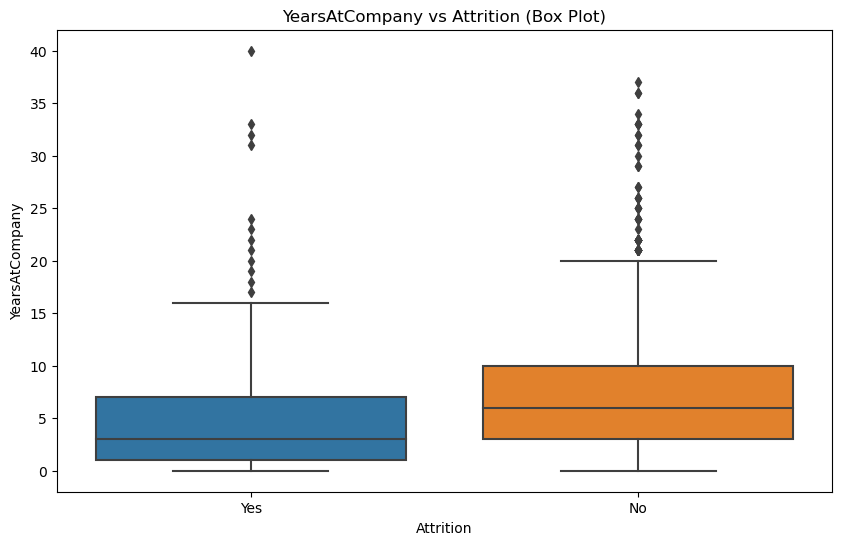

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)
plt.title('YearsAtCompany vs Attrition (Box Plot)')
plt.show()

In [43]:
# Levene test to check the difference in var between two groups

#import scipy.stats as stats

stats.levene(df['YearsAtCompany'][df['Attrition']=='Yes'],
             df['YearsAtCompany'][df['Attrition']=='No'],
             center='median')


LeveneResult(statistic=2.7533975962582904, pvalue=0.09726160332756505)

Above means that Var is equal for both group, p-value more than 0.05

In [44]:
# null hypothesis = there is no significant difference in YearsAtCompany between employees who left and stayed in the company

stats.ttest_ind(df['YearsAtCompany'][df['Attrition']=='Yes'],
                df['YearsAtCompany'][df['Attrition']=='No'],
                equal_var=True)

Ttest_indResult(statistic=-5.1963086670254235, pvalue=2.3188716103863033e-07)

T-Test Result Explanation: YearsAtCompany Variable

T-Test Statistic: The t-test statistic for the "YearsAtCompany" variable comparison is approximately -5.20. This statistic represents the extent of the difference in mean years at the company between employees who have left and those who have stayed.

P-Value: The p-value associated with this t-test is approximately 2.32e-07. This small p-value indicates that the observed difference in mean years at the company is highly unlikely to occur by chance, assuming there's no actual difference between the two groups.

In simpler terms, the low p-value provides strong evidence against the null hypothesis, suggesting a significant difference in the average years at the company for employees who left compared to those who stayed.

Interpreting this outcome, we can conclude that there is a substantial difference in the average years at the company for employees who have left and those who have chosen to remain. This implies that the length of time an employee has spent at the company has an influence on their attrition decision.

End of YearsAtCompany EDA section

#### 7. YearsSinceLastPromotion

In [45]:
#Numerical vs Categorical (Attrition)

meanPromot_Attrition = df.groupby('Attrition', as_index=False)['YearsSinceLastPromotion'].mean()
meanPromot_Attrition.round(2)

,Attrition,YearsSinceLastPromotion
0,No,2.23
1,Yes,1.95


In [46]:
meanPromot_Attrition = df.groupby('Attrition', as_index=False)['YearsSinceLastPromotion'].median()
meanPromot_Attrition.round(2)

,Attrition,YearsSinceLastPromotion
0,No,1.0
1,Yes,1.0


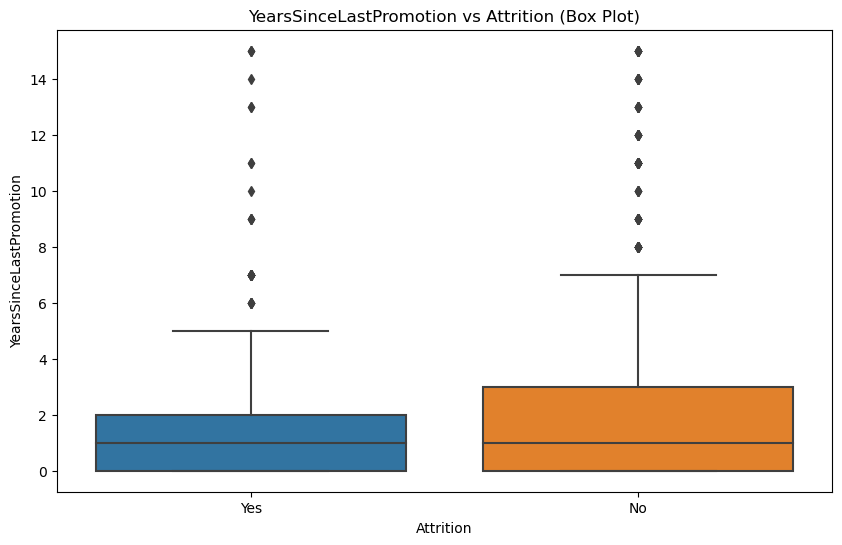

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=df)
plt.title('YearsSinceLastPromotion vs Attrition (Box Plot)')
plt.show()

In [48]:
# Levene test to check the difference in var between two groups

#import scipy.stats as stats

stats.levene(df['YearsSinceLastPromotion'][df['Attrition']=='Yes'],
             df['YearsSinceLastPromotion'][df['Attrition']=='No'],
             center='median')


LeveneResult(statistic=0.39377468332250853, pvalue=0.5304195027928351)

Above means that Var is equal for both group, p-value more than 0.05

In [49]:
# null hypothesis = there is no significant difference in YearsSinceLastPromotion between employees who left and stayed in the company

stats.ttest_ind(df['YearsSinceLastPromotion'][df['Attrition']=='Yes'],
                df['YearsSinceLastPromotion'][df['Attrition']=='No'],
                equal_var=True)

Ttest_indResult(statistic=-1.2657876620135298, pvalue=0.2057899591624936)

T-Test Result Explanation: YearsSinceLastPromotion Variable

T-Test Statistic: The t-test statistic for the "YearsSinceLastPromotion" variable comparison is approximately -1.27. This statistic indicates the extent of the difference in mean years since the last promotion between employees who have left and those who have stayed.

P-Value: The p-value associated with this t-test is approximately 0.21. This p-value suggests that the observed difference in mean years since the last promotion is not statistically significant. It indicates that there's a reasonable likelihood of observing such differences between the two groups by chance, assuming there's no genuine difference.

In simpler terms, the p-value is relatively high, indicating that the difference in mean years since the last promotion is likely due to random variation rather than a true effect.

Interpreting this outcome, we do not have strong evidence to conclude that there is a significant difference in the average years since the last promotion between employees who left and those who stayed.

End of YearsSinceLastPromotion EDA section

End of Numerical vs Categorical EDA

### Categorical vs Categorical EDA

Categorical Variables > EDA result
1. BusinessTravel
2. JobSatisfaction
3. Department
4. Education
5. EducationField
6. EnvSatisfaction
7. Gender
8. JobRole
9. MaritalStatus
10. PerformanceRating
11. OverTime

In [50]:
import pandas as pd
from scipy.stats import chi2_contingency

df.head()

,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,Education,EducationField,EnvSatisfaction,Gender,JobRole,MaritalStatus,PerformanceRating,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,OverTime,Attrition
EmployeeID,,,,,,,,,,,,,,,,,,,
1,41,Travel_Rarely,5993,4,17979,Sales,1,2,Life Sciences,2,Female,Sales Executive,Single,3,0,6,0,Yes,Yes
2,49,Travel_Frequently,5130,2,20520,Research & Development,8,1,Life Sciences,3,Male,Research Scientist,Married,4,3,10,1,No,No
4,37,Travel_Rarely,2090,3,6270,Research & Development,2,2,Other,4,Male,Laboratory Technician,Single,3,3,0,0,Yes,Yes
5,33,Travel_Frequently,2909,3,8727,Research & Development,3,4,Life Sciences,4,Female,Research Scientist,Married,3,3,8,3,Yes,No
7,27,Travel_Rarely,3468,2,10404,Research & Development,2,1,Medical,1,Male,Laboratory Technician,Married,3,3,2,2,No,No


#### 1. BusinessTravel

In [51]:
#crosstabulation
crossTab = pd.crosstab(index=df['BusinessTravel'],
                      columns=df['Attrition'])
crossTab

Attrition,No,Yes
BusinessTravel,,
Non-Travel,138,12
Travel_Frequently,208,69
Travel_Rarely,887,156


In [52]:
# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(crossTab)

# Print the results
print("Chi-Squared Value:", chi2)
print("P-Value:", p)

Chi-Squared Value: 24.182413685655174
P-Value: 5.608614476449931e-06


Chi-Squared Test Result Explanation: BusinessTravel Variable vs Attrition

Chi-Squared Value: The chi-squared value for the comparison between "BusinessTravel" and "Attrition" is approximately 24.18.

P-Value: The p-value associated with the chi-squared test is approximately 5.61e-06.

In simpler terms, the p-value indicates that there's a highly statistically significant association between business travel frequency and attrition. The small p-value suggests that the observed relationship between these two variables is unlikely to have occurred by random chance alone.

Interpreting this outcome, we can conclude that the observed association between business travel frequency and attrition is statistically significant. This implies that the two variables are not independent and that business travel frequency might play a role in influencing attrition within the company.

End of BusinessTravel EDA section

#### 2. JobSatisfaction

In [53]:
#crosstabulation
crossTab2 = pd.crosstab(index=df['JobSatisfaction'],
                      columns=df['Attrition'])
crossTab2

Attrition,No,Yes
JobSatisfaction,,
1,223,66
2,234,46
3,369,73
4,407,52


In [54]:
# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(crossTab2)

# Print the results
print("Chi-Squared Value:", chi2)
print("P-Value:", p)

Chi-Squared Value: 17.505077010348
P-Value: 0.0005563004510387556


Chi-Squared Test Result Explanation: JobSatisfaction Variable

Chi-Squared Value: The chi-squared value for the "JobSatisfaction" variable comparison is approximately 17.51. This value indicates the extent of the association between the JobSatisfaction levels and the attrition status of employees.

P-Value: The p-value associated with this chi-squared test is approximately 0.00056. This p-value suggests that the likelihood of observing such a significant association between JobSatisfaction levels and attrition status by random chance is very low.

Interpreting this outcome, we can conclude that there is a statistically significant relationship between JobSatisfaction levels and employee attrition. The small p-value indicates that the observed association is unlikely to have occurred due to chance, which suggests that JobSatisfaction could be a meaningful factor affecting attrition among employees.

End of JobSatisfaction EDA section

#### 3. Department

In [55]:
#crosstabulation
crossTab3 = pd.crosstab(index=df['Department'],
                      columns=df['Attrition'])
crossTab3

Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


In [56]:
# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(crossTab3)

# Print the results
print("Chi-Squared Value:", chi2)
print("P-Value:", p)

Chi-Squared Value: 10.79600732241067
P-Value: 0.004525606574479633


Chi-Squared Value: The calculated chi-squared statistic for the comparison between the "Department" variable and the "Attrition" variable is approximately 10.80. This value quantifies the degree of association between these two categorical variables.

P-Value: The associated p-value for this chi-squared test is approximately 0.0045. This small p-value indicates that the observed differences in attrition proportions across different departments are unlikely to have occurred by random chance alone.

In simpler terms, the low p-value suggests that there is a statistically significant relationship between an employee's department and their likelihood of attrition. The differences in attrition rates across departments are not likely due to random variation.

Interpreting this outcome, we can conclude that there is evidence to suggest that the department an employee works in may influence their propensity to leave the company. The specific implications and practical significance of this relationship will need further investigation and consideration within the context of the organization.

End of Department EDA section

#### 4. Education

In [57]:
#crosstabulation
crossTab4 = pd.crosstab(index=df['Education'],
                      columns=df['Attrition'])
crossTab4

Attrition,No,Yes
Education,,
1,139,31
2,238,44
3,473,99
4,340,58
5,43,5


In [58]:
# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(crossTab4)

# Print the results
print("Chi-Squared Value:", chi2)
print("P-Value:", p)

Chi-Squared Value: 3.0739613982367193
P-Value: 0.5455253376565949


Chi-Squared Value: The computed chi-squared statistic for the comparison between the "Education" variable and the "Attrition" variable is approximately 3.07. This statistic gauges the degree of association between these categorical variables.

P-Value: The associated p-value for this chi-squared test is approximately 0.546. This relatively large p-value indicates that the observed differences in attrition proportions across different education levels are reasonably likely to have arisen from random chance alone.

In simpler terms, the higher p-value suggests that there isn't strong evidence to conclude a significant relationship between an employee's education level and their likelihood of attrition. The differences in attrition rates across education levels are not likely to be beyond what we would expect from random variation.

Interpreting this outcome, we fail to reject the null hypothesis. This implies that there is no compelling evidence to support the claim that education level significantly affects attrition in the context of this dataset.

End of Education EDA section

#### 5. EducationField

In [59]:
#crosstabulation
crossTab5 = pd.crosstab(index=df['EducationField'],
                      columns=df['Attrition'])
crossTab5

Attrition,No,Yes
EducationField,,
Human Resources,20,7
Life Sciences,517,89
Marketing,124,35
Medical,401,63
Other,71,11
Technical Degree,100,32


In [60]:
# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(crossTab5)

# Print the results
print("Chi-Squared Value:", chi2)
print("P-Value:", p)

Chi-Squared Value: 16.024674119585427
P-Value: 0.006773980139025212


Chi-Squared Value: The computed chi-squared statistic for the comparison between the "EducationField" variable and the "Attrition" variable is approximately 16.02. This statistic quantifies the strength of the association between these categorical variables.

P-Value: The associated p-value for this chi-squared test is approximately 0.007. This p-value is below the commonly used significance level of 0.05, indicating that the observed differences in attrition proportions across different education fields are unlikely to have occurred due to random chance.

In simpler terms, the low p-value suggests that there is evidence to believe that education field might play a role in influencing attrition rates among employees.

Interpreting this outcome, we can reject the null hypothesis. This suggests that education field could be a significant factor affecting attrition rates among employees. The data provides evidence that different education fields may have different attrition patterns.

End of EducationField EDA section

#### 6. EnvSatisfaction

In [61]:
#crosstabulation
crossTab6 = pd.crosstab(index=df['EnvSatisfaction'],
                      columns=df['Attrition'])
crossTab6

Attrition,No,Yes
EnvSatisfaction,,
1,212,72
2,244,43
3,391,62
4,386,60


In [62]:
# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(crossTab6)

# Print the results
print("Chi-Squared Value:", chi2)
print("P-Value:", p)

Chi-Squared Value: 22.503881435842295
P-Value: 5.1234689062894205e-05


Chi-Squared Value: The computed chi-squared statistic for the comparison between the "EnvSatisfaction" variable and the "Attrition" variable is approximately 22.50. This statistic measures the strength of the relationship between these categorical variables.

P-Value: The associated p-value for this chi-squared test is approximately 0.00005. This p-value is significantly smaller than the common significance level of 0.05, indicating that the observed differences in attrition proportions across different levels of environmental satisfaction are highly unlikely to be due to random chance.

In simpler terms, the very low p-value suggests that there is strong evidence to suggest that employee attrition rates vary significantly based on their level of environmental satisfaction.

Interpreting this outcome, we have sufficient reason to reject the null hypothesis. This implies that the level of environmental satisfaction could indeed be a significant contributor to the differences in attrition rates among employees. The data indicates that the level of satisfaction with the work environment may play a substantial role in employee attrition.

End of EnvSatisfaction EDA section

#### 7. Gender

In [63]:
#crosstabulation
crossTab7 = pd.crosstab(index=df['Gender'],
                      columns=df['Attrition'])
crossTab7

Attrition,No,Yes
Gender,,
Female,501,87
Male,732,150


In [64]:
# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(crossTab7)

# Print the results
print("Chi-Squared Value:", chi2)
print("P-Value:", p)

Chi-Squared Value: 1.1169671241970975
P-Value: 0.29057244902890855


Chi-Squared Value: The computed chi-squared statistic for the comparison between the "Gender" variable and the "Attrition" variable is approximately 1.12. This statistic measures the strength of the relationship between these categorical variables.

P-Value: The associated p-value for this chi-squared test is approximately 0.291. This p-value is greater than the common significance level of 0.05, indicating that the observed differences in attrition proportions between genders are not statistically significant at a conventional level of significance.

In simpler terms, the p-value suggests that there is insufficient evidence to conclude that gender has a significant impact on employee attrition rates.

Interpreting this outcome, we do not have enough statistical evidence to reject the null hypothesis. This implies that the data does not provide strong support for the idea that gender is a significant factor influencing attrition rates among employees.

End of Gender EDA section

#### 8. JobRole

In [65]:
#crosstabulation
crossTab8 = pd.crosstab(index=df['JobRole'],
                      columns=df['Attrition'])
crossTab8

Attrition,No,Yes
JobRole,,
Healthcare Representative,122,9
Human Resources,40,12
Laboratory Technician,197,62
Manager,97,5
Manufacturing Director,135,10
Research Director,78,2
Research Scientist,245,47
Sales Executive,269,57
Sales Representative,50,33


In [66]:
# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(crossTab8)

# Print the results
print("Chi-Squared Value:", chi2)
print("P-Value:", p)

Chi-Squared Value: 86.19025367670434
P-Value: 2.752481638050657e-15


Chi-Squared Value: The calculated chi-squared statistic for the comparison between the "JobRole" variable and the "Attrition" variable is approximately 86.19. This statistic quantifies the strength of the association between these categorical variables.

P-Value: The p-value associated with this chi-squared test is extremely small, approximately 2.75e-15. This indicates that the likelihood of observing such a substantial association (or an even more significant one) between job roles and attrition, assuming no true link between them (null hypothesis being true), is exceedingly low.

In simpler terms, the very low p-value suggests that the observed relationship between job roles and attrition is highly unlikely to occur by chance alone. This typically leads us to reject the null hypothesis.

Interpreting this outcome, we can conclude that there is a significant connection between job roles and employee attrition rates. The specific roles that employees hold within the company seem to have a meaningful impact on whether they leave or remain with the organization. Further analysis would be necessary to determine the precise nature and implications of this relationship.

End of JobRole EDA section

#### 9. MaritalStatus

In [67]:
#crosstabulation
crossTab9 = pd.crosstab(index=df['MaritalStatus'],
                      columns=df['Attrition'])
crossTab9

Attrition,No,Yes
MaritalStatus,,
Divorced,294,33
Married,589,84
Single,350,120


In [68]:
# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(crossTab9)

# Print the results
print("Chi-Squared Value:", chi2)
print("P-Value:", p)

Chi-Squared Value: 46.163676540848705
P-Value: 9.45551106034083e-11


Chi-Squared Value: The computed chi-squared statistic for the comparison between the "MaritalStatus" variable and the "Attrition" variable is approximately 46.16. This statistic reflects the strength of the relationship between these two categorical variables.

P-Value: The p-value associated with the chi-squared test is exceptionally small, approximately 9.46e-11. This small p-value indicates that the probability of observing such a substantial association (or a more significant one) between marital status and attrition, assuming no real association between them (null hypothesis being true), is extremely low.

In simpler terms, the very low p-value suggests that the observed connection between marital status and attrition is highly unlikely to occur by random chance. Consequently, we tend to reject the null hypothesis.

Interpreting this outcome, we can conclude that there is a significant link between marital status and employee attrition. The marital status of employees seems to have an important influence on their decision to leave or remain with the company. Further analysis would be needed to comprehend the specifics of this relationship and its potential implications.

End of MaritalStatus EDA section

#### 10. PerformanceRating

In [69]:
#crosstabulation
crossTab10 = pd.crosstab(index=df['PerformanceRating'],
                      columns=df['Attrition'])
crossTab10

Attrition,No,Yes
PerformanceRating,,
3,1044,200
4,189,37


In [70]:
# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(crossTab10)

# Print the results
print("Chi-Squared Value:", chi2)
print("P-Value:", p)

Chi-Squared Value: 0.00015475439428271534
P-Value: 0.9900745465934576


Chi-Squared Value: The computed chi-squared statistic for the comparison between the "PerformanceRating" variable and the "Attrition" variable is approximately 0.000155. This small value indicates a very weak relationship between these two categorical variables.

P-Value: The p-value associated with the chi-squared test is approximately 0.990. This p-value suggests that the likelihood of observing such a weak association (or a weaker one) between performance rating and attrition, assuming no true association between them (null hypothesis being true), is quite high.

In simpler terms, the relatively high p-value indicates that the observed connection between performance rating and attrition could easily happen by random chance. This lack of significance makes it challenging to conclude that there is a substantial relationship between these two variables.

Interpreting this outcome, we do not have sufficient evidence to claim a significant association between performance rating and employee attrition. It appears that performance rating might not be a strong factor influencing employees' decisions to leave or stay in the company. Further investigation might be necessary to explore this relationship more comprehensively.

End of PerformanceRating EDA section

#### 11. OverTime

In [71]:
#crosstabulation
crossTab11 = pd.crosstab(index=df['OverTime'],
                      columns=df['Attrition'])
crossTab11

Attrition,No,Yes
OverTime,,
No,944,110
Yes,289,127


In [72]:
# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(crossTab11)

# Print the results
print("Chi-Squared Value:", chi2)
print("P-Value:", p)

Chi-Squared Value: 87.56429365828768
P-Value: 8.15842372153832e-21


Chi-Squared Value: The calculated chi-squared statistic for the comparison between the "OverTime" variable and the "Attrition" variable is approximately 87.56. This relatively high value indicates a strong relationship between these two categorical variables.

P-Value: The p-value associated with the chi-squared test is approximately 8.16e-21, an extremely small value. This p-value suggests that the probability of observing such a significant association (or an even more significant one) between overtime status and attrition, assuming no true association between them (null hypothesis being true), is incredibly low.

In simpler terms, the very low p-value indicates that the observed connection between overtime status and attrition is highly unlikely to occur by random chance. This suggests that there is a strong likelihood of a substantial relationship between these two variables.

Interpreting this outcome, we have strong evidence to support the idea that employee attrition is significantly associated with their overtime status. The data suggests that employees who work overtime might be more prone to leaving the company compared to those who do not work overtime. This is an important finding that can inform HR and management decisions related to workload and work-life balance.

End of OverTime EDA section

### Summary of Findings

**Numerical Variables (T-Test):**
1. Age: p-value = 8.356308021103587e-10
2. MonthlyIncome: p-value = 4.433588628286071e-13
3. Bonus: p-value = 3.692333845137077e-14
4. DistanceFromHome: p-value = 0.004136511971511406
5. TrainingTimeLastYear: p-value = 0.022578499737201205
6. YearsAtCompany: p-value = 2.3188716103863033e-07
7. YearsSinceLastPromotion: p-value = 0.2057899591624936

**Categorical Variables (Chi-Squared Test):**
1. BusinessTravel: p-value = 5.608614476449931e-06
2. JobSatisfaction: p-value = 0.0005563004510387556
3. Department: p-value = 0.004525606574479633
4. Education: p-value = 0.5455253376565949
5. EducationField: p-value = 0.006773980139025212
6. EnvSatisfaction: p-value = 5.1234689062894205e-05
7. Gender: p-value = 0.29057244902890855
8. JobRole: p-value = 2.752481638050657e-15
9. MaritalStatus: p-value = 9.45551106034083e-11
10. PerformanceRating: p-value = 0.9900745465934576
11. OverTime: p-value = 8.15842372153832e-21

Summary of the variables' significance in affecting attrition, sorted from highest to lowest significance based on the obtained p-values:

**Numerical Variables (T-Test):**
1. Bonus (p-value = 3.692333845137077e-14) > Yes
2. MonthlyIncome (p-value = 4.433588628286071e-13) > Yes
3. Age (p-value = 8.356308021103587e-10) > Yes
4. YearsAtCompany (p-value = 2.3188716103863033e-07) > Yes
5. DistanceFromHome (p-value = 0.004136511971511406) > Yes
6. TrainingTimeLastYear (p-value = 0.022578499737201205) > Yes, but not much significance
7. YearsSinceLastPromotion (p-value = 0.2057899591624936) > No

**Categorical Variables (Chi-Squared Test):**
1. OverTime (p-value = 8.15842372153832e-21) > Yes
2. JobRole (p-value = 2.752481638050657e-15) > Yes
3. MaritalStatus (p-value = 9.45551106034083e-11) > Yes
4. BusinessTravel (p-value = 5.608614476449931e-06) > Yes
5. EnvSatisfaction (p-value = 5.1234689062894205e-05) > Yes
6. JobSatisfaction (p-value = 0.0005563004510387556) > Yes
7. Department (p-value = 0.004525606574479633) > Yes
8. EducationField (p-value = 0.006773980139025212) > Yes
9. Gender (p-value = 0.29057244902890855) > No
10. Education (p-value = 0.5455253376565949) > No
11. PerformanceRating (p-value = 0.9900745465934576) > No

With Yes/No showing whether or not they affect Attrition

#### End of EDA Section

### Machine Learning Model

In [73]:
#IMPORT PACKAGES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

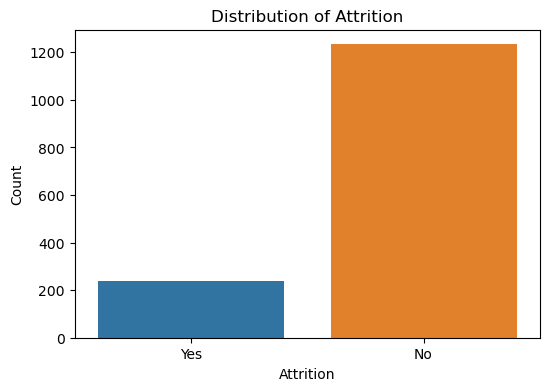

No     1233
Yes     237
Name: Attrition, dtype: int64


In [74]:
# Count occurrences of each value in the "Attrition" column
AttritionCounts = df['Attrition'].value_counts()

# Create a count plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Attrition')
plt.title("Distribution of Attrition")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

# Display the count of each value
print(AttritionCounts)

In [75]:
#Proportion of attrition count, normalize it
AttritionCounts = df['Attrition'].value_counts(normalize=True)*100
AttritionCounts

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

Imbalance Dataset, 83.88% No while only 16.12% Yes

In [76]:
df.shape

(1470, 19)

In [77]:
df.columns

Index(['Age', 'BusinessTravel', 'MonthlyIncome', 'JobSatisfaction', 'Bonus',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvSatisfaction', 'Gender', 'JobRole', 'MaritalStatus',
       'PerformanceRating', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'OverTime', 'Attrition'],
      dtype='object')

#### Feature Selection

In [78]:
#update dataframe df - only keep the variables of interest (all input variable that significantly affecting the output)
#omitting Gender, PerformanceRating, Education, and YearsSinceLastPromotion variables

df_ml = df[['Age', 'BusinessTravel', 'MonthlyIncome', 'JobSatisfaction', 'Bonus',
            'Department', 'DistanceFromHome', 'EducationField',
            'EnvSatisfaction', 'JobRole', 'MaritalStatus',
            'TrainingTimesLastYear', 'YearsAtCompany',
            'OverTime', 'Attrition']]
df_ml.head()

,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,EducationField,EnvSatisfaction,JobRole,MaritalStatus,TrainingTimesLastYear,YearsAtCompany,OverTime,Attrition
EmployeeID,,,,,,,,,,,,,,,
1,41,Travel_Rarely,5993,4,17979,Sales,1,Life Sciences,2,Sales Executive,Single,0,6,Yes,Yes
2,49,Travel_Frequently,5130,2,20520,Research & Development,8,Life Sciences,3,Research Scientist,Married,3,10,No,No
4,37,Travel_Rarely,2090,3,6270,Research & Development,2,Other,4,Laboratory Technician,Single,3,0,Yes,Yes
5,33,Travel_Frequently,2909,3,8727,Research & Development,3,Life Sciences,4,Research Scientist,Married,3,8,Yes,No
7,27,Travel_Rarely,3468,2,10404,Research & Development,2,Medical,1,Laboratory Technician,Married,3,2,No,No


In [79]:
# Assign Input and Output
x = df_ml.iloc[:,:-1]
y = df_ml.iloc[:,-1]

In [80]:
x.head()

,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,EducationField,EnvSatisfaction,JobRole,MaritalStatus,TrainingTimesLastYear,YearsAtCompany,OverTime
EmployeeID,,,,,,,,,,,,,,
1,41,Travel_Rarely,5993,4,17979,Sales,1,Life Sciences,2,Sales Executive,Single,0,6,Yes
2,49,Travel_Frequently,5130,2,20520,Research & Development,8,Life Sciences,3,Research Scientist,Married,3,10,No
4,37,Travel_Rarely,2090,3,6270,Research & Development,2,Other,4,Laboratory Technician,Single,3,0,Yes
5,33,Travel_Frequently,2909,3,8727,Research & Development,3,Life Sciences,4,Research Scientist,Married,3,8,Yes
7,27,Travel_Rarely,3468,2,10404,Research & Development,2,Medical,1,Laboratory Technician,Married,3,2,No


In [81]:
x.shape

(1470, 14)

In [82]:
#create dummy variables for categorical variable inside input dataframe
x = pd.get_dummies(x, drop_first=True)
x.head()

,Age,MonthlyIncome,JobSatisfaction,Bonus,DistanceFromHome,EnvSatisfaction,TrainingTimesLastYear,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,41,5993,4,17979,1,2,0,6,0,1,...,0,0,0,0,0,1,0,0,1,1
2,49,5130,2,20520,8,3,3,10,1,0,...,0,0,0,0,1,0,0,1,0,0
4,37,2090,3,6270,2,4,3,0,0,1,...,1,0,0,0,0,0,0,0,1,1
5,33,2909,3,8727,3,4,3,8,1,0,...,0,0,0,0,1,0,0,1,0,1
7,27,3468,2,10404,2,1,3,2,0,1,...,1,0,0,0,0,0,0,1,0,0


In [83]:
#PARTITIONING
#stratified sampling > 83.88/16.12 train and test set

#Partioning dataset. Due to inbalance dataset value, use stratified sampling
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1612,random_state=0, stratify = y)

In [84]:
y_train.value_counts()

No     1034
Yes     199
Name: Attrition, dtype: int64

In [85]:
#FEATURES SCALING FOR TRAIN SET

#feature scaling/standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

In [86]:
x_train[1]

array([ 1.84906925,  0.87586405, -0.63591286,  0.75829254,  1.20997007,
        0.24505683, -1.39356454,  0.29167957, -0.48142313,  0.63838409,
       -1.39381518, -0.6446815 , -0.83567165, -0.33588076,  1.44844398,
       -0.24347146, -0.31297271,  5.07979801, -0.47117086, -0.28395603,
       -0.32378806, -0.23971109, -0.49923954, -0.51944675, -0.23971109,
        1.08911442, -0.68911565, -0.64720342])

### Logistic Regression Model

In [87]:
#####Train Logistic Regression Algorithm

#Import LogisticRegression() function
from sklearn.linear_model import LogisticRegression

#Create a Logistic Regression classifier
class_model = LogisticRegression(random_state=0)

#Train the Logistic Regression algorithm using train set
class_model.fit(x_train,y_train)

LogisticRegression(random_state=0)

### Naive Bayes Model

#####Train Naive Bayes Algorithm
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
class_model = GaussianNB()

#Train the model using the training sets
class_model.fit(x_train,y_train)

In [88]:
#FEATURE SCALING FOR TEST SET
x_test.head()

,Age,MonthlyIncome,JobSatisfaction,Bonus,DistanceFromHome,EnvSatisfaction,TrainingTimesLastYear,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
EmployeeID,,,,,,,,,,,,,,,,,,,,,
458,27,6214,2,18642,8,2,3,8,0,1,...,0,0,0,0,0,1,0,1,0,0
1709,29,2974,3,8922,9,4,2,5,0,1,...,1,0,0,0,0,0,0,1,0,0
952,25,2413,2,7239,19,3,2,1,0,1,...,0,0,0,0,0,0,1,1,0,1
909,39,5204,4,15612,2,4,2,5,0,1,...,0,0,0,0,0,0,0,1,0,0
207,32,8998,4,26994,8,2,2,9,1,0,...,0,0,0,0,0,1,0,0,1,0


In [89]:
#Feature Scaling the Test Set
from sklearn.preprocessing import StandardScaler
x_test = scaler.transform(x_test)

In [90]:
#APPLY MODEL WITH SCALED TEST SET
# Apply for Test Set
y_pred = class_model.predict(x_test)
y_pred

array(['No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', '

In [91]:
#putting the result into dataframe

#Dataframe of Predicted Output and Actual Output for Test set
df_validate = pd.DataFrame({'Actual':y_test,'Predicted':y_pred}) #Create Data Frame
df_validate['Predicted']=df_validate['Predicted']
df_validate.head(5)

,Actual,Predicted
EmployeeID,,
458,No,No
1709,No,No
952,Yes,Yes
909,No,No
207,No,No


In [92]:
#PERFORMANCE EVALUATION
#CONFUSION MATRIX

# Confusion Matrix
print(pd.crosstab(y_pred,y_test))

Attrition   No  Yes
row_0              
No         197   33
Yes          2    5


In [93]:
# Precision & Sensitivity/Recall Report
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

          No       0.86      0.99      0.92       199
         Yes       0.71      0.13      0.22        38

    accuracy                           0.85       237
   macro avg       0.79      0.56      0.57       237
weighted avg       0.83      0.85      0.81       237



#### Logistic Regression Model Result Summary

The Logistic Regression model demonstrates performance in predicting attrition for different classes:

For the "No" Class (employees who did not leave the company):

- Precision: 0.86
- Recall: 0.99
- F1-Score: 0.92

The model achieves a high precision for the "No" class, indicating that when it predicts an employee will not leave the company, it is correct 86% of the time. Additionally, the recall is excellent at 99%, indicating that the model captures almost all of the actual "No" cases. The F1-Score, which balances precision and recall, is 0.92.

For the "Yes" Class (employees who left the company):

- Precision: 0.71
- Recall: 0.13
- F1-Score: 0.22

In predicting the "Yes" class, the model's precision is 0.71, suggesting that 71% of the predictions for employees leaving the company are accurate. However, the recall is relatively low at 13%, indicating that the model captures only a small portion of the actual "Yes" cases. The F1-Score for this class is 0.22.

The overall accuracy of the model is 85%, with a weighted average F1-Score of 0.81. The model demonstrates a strong ability to predict the "No" class ("Did not leave") with high precision and recall. However, its performance in predicting attrition (employees leaving) is less satisfactory, with relatively lower precision and recall. Similar to the Naive Bayes model, there is potential for improvement through adjustments, feature engineering, or trying different algorithms.

#### Naive Bayes Model Result Summary

The Naive Bayes model demonstrates varying performance in predicting attrition for different classes:

For the "No" Class (employees who did not leave the company):
- Precision: 0.90
- Recall: 0.69
- F1-Score: 0.78

The model achieves a high precision for the "No" class, indicating that when it predicts an employee will not leave the company, it is correct 90% of the time. However, the recall is relatively lower, implying that the model captures only 69% of the actual "No" cases. The F1-Score, which balances precision and recall, is 0.78.

For the "Yes" Class (employees who left the company):
- Precision: 0.27
- Recall: 0.61
- F1-Score: 0.38

In predicting the "Yes" class, the model's precision is 0.27, meaning that only 27% of the predictions for employees leaving the company are accurate. However, the recall is relatively higher at 61%, indicating that the model correctly identifies 61% of the actual "Yes" cases. The F1-Score for this class is 0.38.

Overall, the model demonstrates a higher ability to predict the "No" class ("Did not leave") with better precision, but there is room for improvement in recall for both classes. This indicates that the model is more effective in identifying employees who will likely stay with the company, while its performance in predicting attrition (employees leaving) can be enhanced. Further adjustments, feature engineering, or trying different algorithms could lead to improved predictions.

### Comparison Between the two ML Models

**Naive Bayes Model:**
- Performs reasonably well in predicting employees leaving ("Yes") with higher recall (0.61) compared to Logistic Regression (0.13).
- Captures more actual "Yes" cases.
- Precision for "Yes" class is relatively lower at 0.27, indicating not all "Yes" predictions are accurate.
- Balanced by higher precision (0.90) and lower recall (0.69) for the "No" class.

**Logistic Regression Model:**
- Excels in predicting employees not leaving ("No").
- Achieves impressive precision of 0.86 for "No" class, indicating highly accurate predictions.
- Exceptional recall for "No" class at 0.99, capturing almost all actual "No" cases.
- Recall for "Yes" class is relatively low at 0.13, missing a significant portion of actual "Yes" cases.

**Conclusion:**
- Focusing on minimizing false negatives (missing employees leaving):
  - Logistic Regression model seems more suitable due to high recall for "No" class.
  - Despite lower recall for "Yes," higher precision ensures more reliable positive predictions for employees leaving.

In scenarios where missing employees intending to leave is a critical concern (common in attrition prediction), Logistic Regression's high recall for "No" class makes it a strong choice.

End of ML Model section

#### Save the Model & Parameter

#Save the Model
import pickle

filename = 'LogReg_modelMLR.sav' #Assigning name to the model

#Write it to the file
pickle.dump(class_model, open(filename,'wb')) #wb - write binary

#Save the Scaler Parameter
import joblib

fileScaler = 'scaler_regMLR.save' #Assigning name to the scaler

joblib.dump(scaler, fileScaler)